# Библиотеки Python для DS (семинары)

Урок 6. Определение проблемы переобучения на практике

Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.


## Выполнение домашней работы

##### Используем Iris.csv

In [7]:
!pip install opendatasets


In [8]:
# Библиотеки для скачивания датасета
from pathlib import Path
import opendatasets as od

In [10]:
# Скачиваем датасет
dataset_path = Path('uciml/iris')
# Проверяем существование директории с датасетом
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/uciml/iris/data')


Dataset URL: https://www.kaggle.com/datasets/uciml/iris


100%|██████████| 3.60k/3.60k [00:00<00:00, 1.03MB/s]

In [11]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import learning_curve

In [12]:
# Загружаем датасет
df = pd.read_csv('iris/Iris.csv')

##### 1. Предварительная обработка данных.
— Загрузите данные и проведите их первичный анализ.

— Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.

— Разделите данные на тренировочный и тестовый наборы.

In [13]:
# Выводим дата фрейм
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Этот фрейм данных содержит следующие столбцы:

1. Id (Индификационный номер)
2. SepalLengthCm (Длина чашелистника см)
3. SepalWidthCm (Ширина чашелистника см)
4. PetalLengthCm (Длинна лепестка см)
5. PetalWidthCm (Ширина лепестка см)
6. Species (Вид)


In [15]:
# Выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Из общей информации следует:
1. DataFrame содержит 150 записей (от индекса 0 до 149)
2. Всего 6 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Все колонки в float64 кроме Species которая содержит object и колонки Id в которой хранится int64(Id была удалена)

In [16]:
# Удаляем столбец Id поскольку он для работы нам не нужен
df_irus = df.drop('Id', axis=1)

In [17]:
# Смотрим количество пропущеных значений.
print("Количество пропущенных значений:")
print(df_irus.isnull().sum())

Количество пропущенных значений:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [18]:
# Проверяем на дубликаты
print("Количество дубликатов:")
print(df.duplicated().sum())

Количество дубликатов:
0


In [19]:
# Смотрим тип данных
df_irus.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [20]:
# Статистический анализ числовых переменных
df_irus.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. SepalLengthCm (Длина чашелистника см):
- Средняя длина чашелистника на уровне 5.80
- Миниманая 4.3
- Максимальная 7.9
- Медиана равна 5.84
- Отклонение состовляет 0.82
2. SepalWidthCm (Ширина чашелистника см):
- Средняя ширина чашелитсника на уровне 3.00
- Миниманая 2.00
- Максимальная 4.40
- Медиана равна 3.05
- Отклонение состовляет 0.43
3. PetalLengthCm (Длинна лепестка см):
- Средняя длинна лепестка на уровне 4.35
- Миниманая 1.00
- Максимальная 6.9
- Медиана равна 3.75
- Отклонение состовляет 1.76
4. PetalWidthCm (Ширина лепестка см):
- Средняя ширина лепестка на уровне 1.30
- Миниманая 0.10
- Максимальная 2.50
- Медиана равна 1.19
- Отклонение состовляет 0.76

In [21]:
# Статистический анализ объектных переменных
df_irus.describe(include='object').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


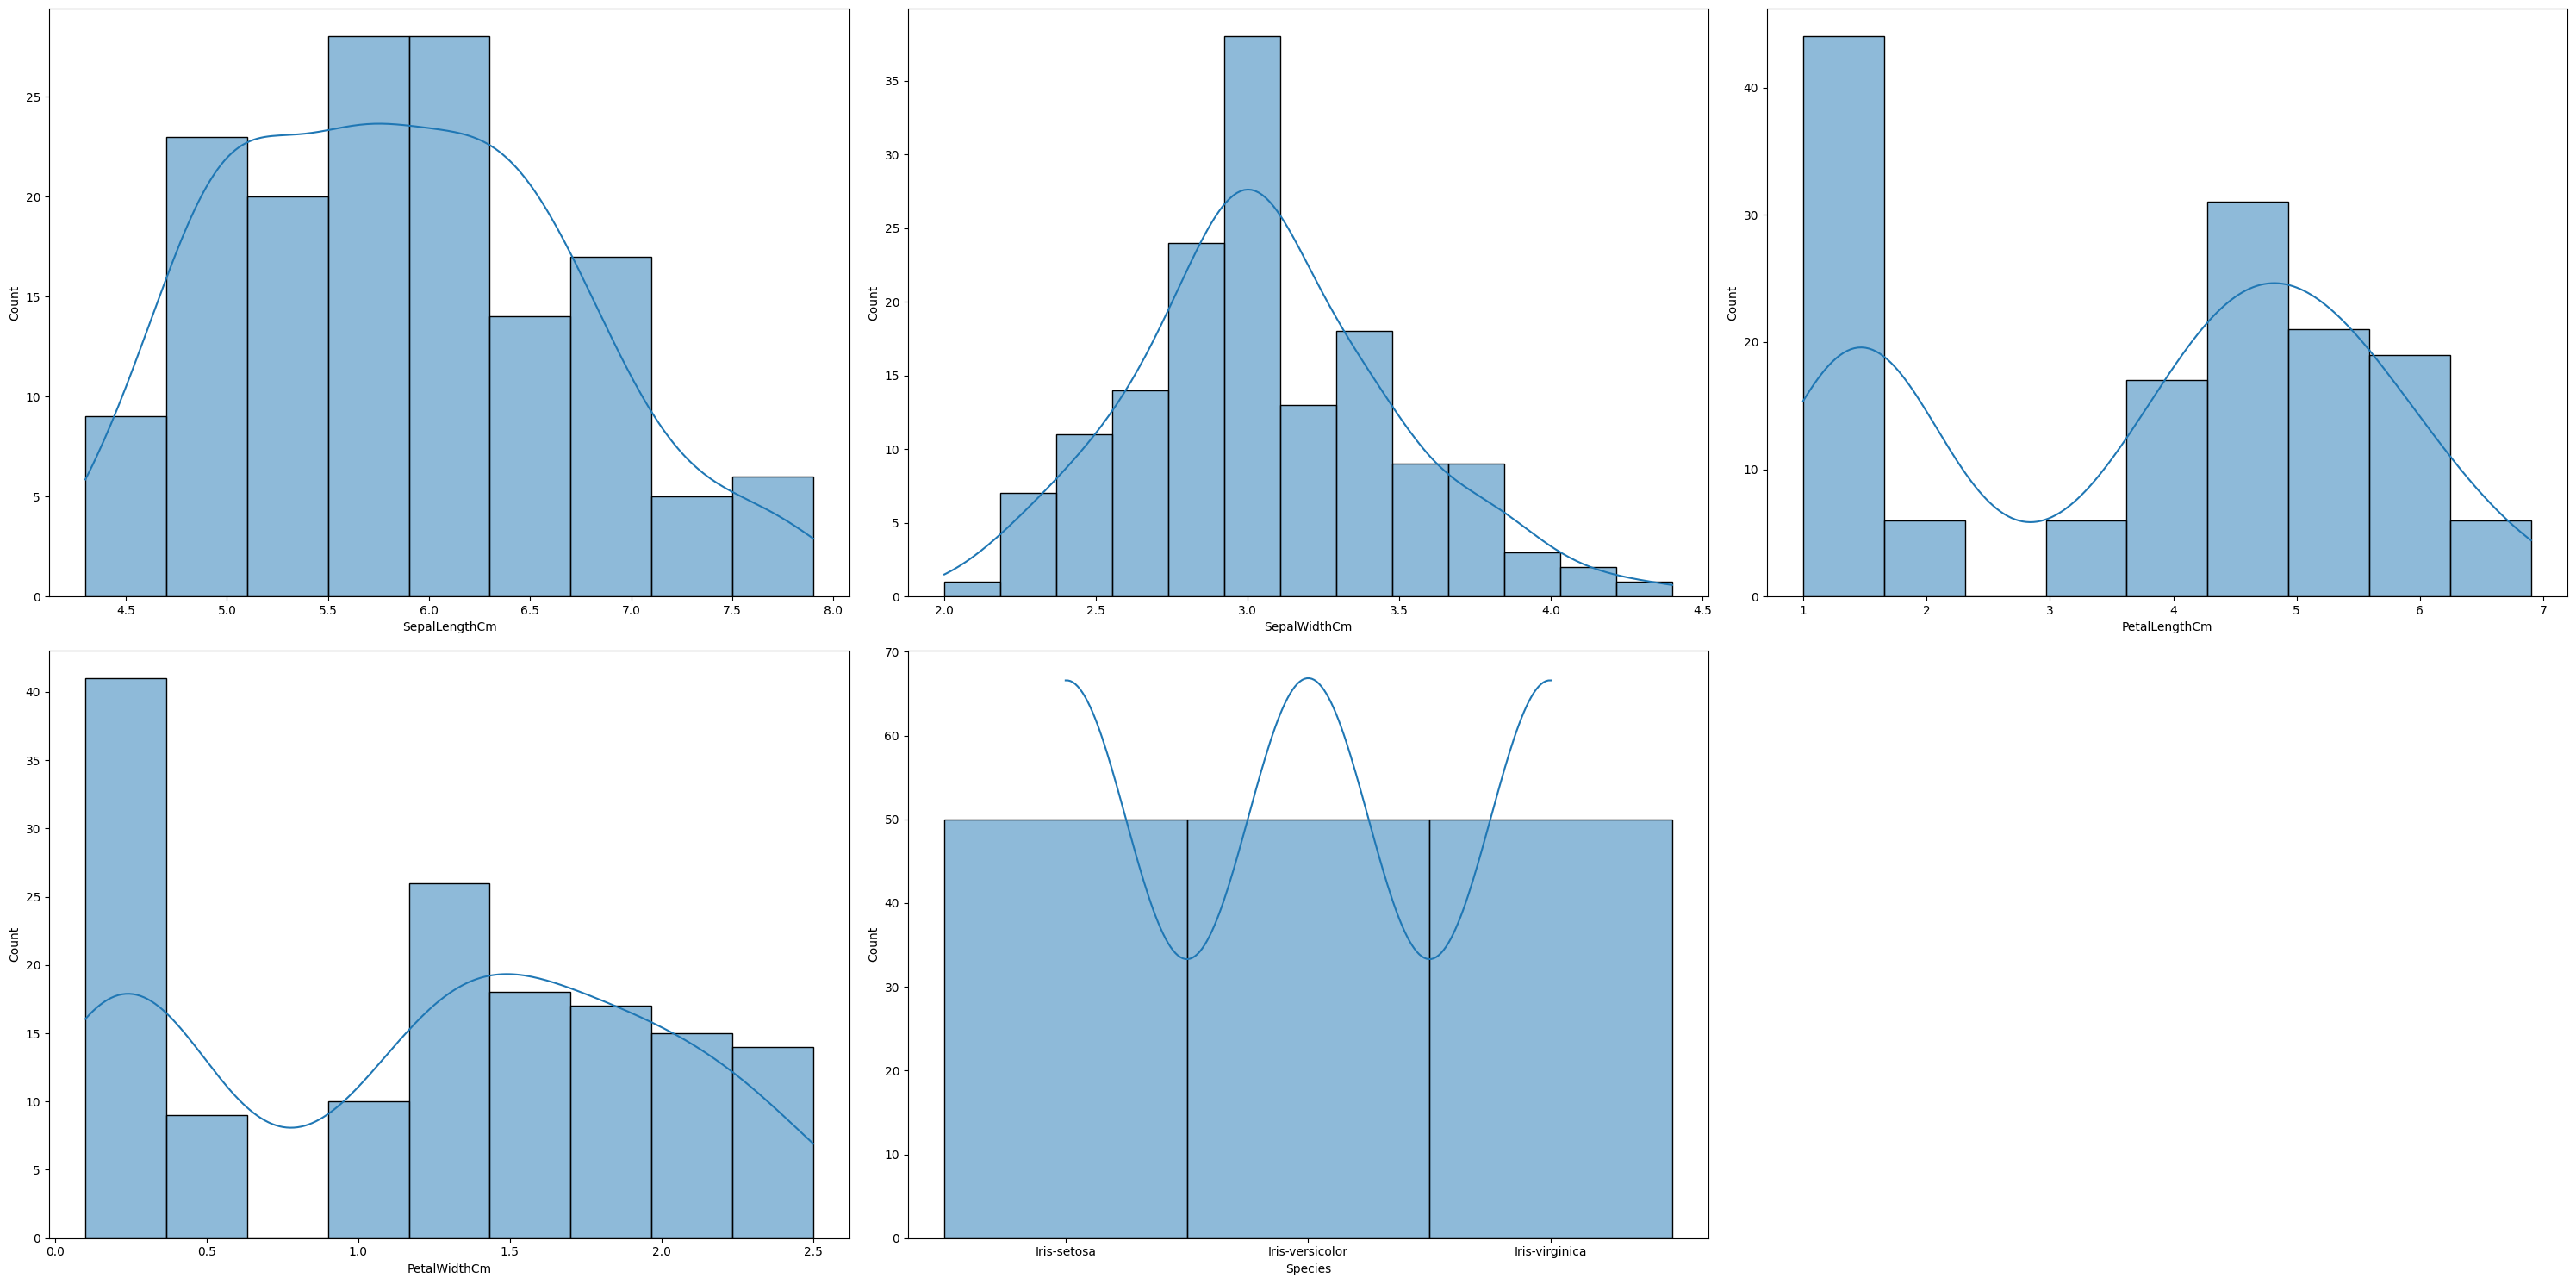

In [22]:
# Визуализация гистограмм
plt.figure(figsize=(30, 15))
for i, column in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_irus[column], kde=True)

plt.tight_layout()
plt.show()

In [23]:
# Подготавливаем столбец Species перед обученим модели
# Приводим обектные значения к интовым
mapDiag = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_irus['Species'] = df_irus['Species'].map(mapDiag)

In [24]:
# Проверяем тип чтобы удостовериться, что изменения прошли успешно
print(df_irus.dtypes['Species'])

int64


In [25]:
# Извлечём diagnosis из признаков
X = df_irus.drop('Species', axis=1)
# Определим целевую переменную
target = df_irus['Species']

In [26]:
# Стандартизация данных
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Создание нового DataFrame со стандартизированными данными
df_scaled = pd.DataFrame(X_scaler, columns=X.columns)

In [27]:
# Определяем переменные для обучения
df_irus_scaled = df_scaled
y = target

# Разделяем данные на обучающий и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(df_irus_scaled, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (120, 4)
Размер тестового набора: (30, 4)


##### 2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.

— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

In [28]:
# Обучение без регуляризации
no_reg = LogisticRegression(penalty=None, random_state=42)
no_reg.fit(X_train, y_train)

# Оценка качества на тренировочных данных
y_train_pred = no_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Оценка качества на тестовых данных
y_test_pred = no_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Получение вероятностей
y_test_probs_no_reg = no_reg.predict_proba(X_test)[:, 1]

# Вычисление R2 для вероятностей
r2_score_no_reg = r2_score(y_test, y_test_probs_no_reg)

# Вывод результатов
print("Точность на тренировочных данных (без регуляризации):", train_accuracy)
print("Точность на тестовых данных (без регуляризации):", test_accuracy)
print("R2 score (без регуляризации):", r2_score_no_reg)

Точность на тренировочных данных (без регуляризации): 0.9833333333333333
Точность на тестовых данных (без регуляризации): 1.0
R2 score (без регуляризации): -1.0499124671658326


Видим что модель явно переобучается, за это может отвечать не только отсуствие регуляризации но и нехватка данных.

In [29]:
# Определение диапазона значений для C (обратный коэффициент регуляризации)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Обучение модели с L1 регуляризацией
# penalty='l1', что означает, что модель будет использовать L1 регуляризацию (также известную как Lasso).
model_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=C_values, cv=5, random_state=42)
model_l1.fit(X_train, y_train)

# Оценка качества
y_train_pred_l1 = model_l1.predict(X_train)
y_test_pred_l1 = model_l1.predict(X_test)

# Получение метрик Accuracy, precision, recall, f1-score, support
train_accuracy_l1 = accuracy_score(y_train, y_train_pred_l1)
test_accuracy_l1 = accuracy_score(y_test, y_test_pred_l1)

# Получение вероятностей
y_test_probs_l1 = model_l1.predict_proba(X_test)[:, 1]

# Вычисление R2 для вероятностей
r2_score_l1 = r2_score(y_test, y_test_probs_l1)

# Вывод результатов
print("Точность на тренировочных данных (L1 регуляризация):", train_accuracy_l1)
print("Точность на тестовых данных (L1 регуляризация):", test_accuracy_l1)
print("Отчет по классификации (L1 регуляризация):")
print(classification_report(y_test, y_test_pred_l1))
print("R2 score (L1 регуляризация):", r2_score_l1)


Точность на тренировочных данных (L1 регуляризация): 0.9666666666666667
Точность на тестовых данных (L1 регуляризация): 1.0
Отчет по классификации (L1 регуляризация):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

R2 score (L1 регуляризация): -0.6061799275884703


Точность тренировочных данных состовляет 0.9666666666666667, что позволяет сделать вывод, что модель хорошо обучилась на данных, точность 1.0 на тестовых данных свидетельствует о том, что модель могла переобучиться при условии, что данных мало или их небольшое разнообрази. Остальные результаты precision, recall, f1-score тоже идеальны 1.0 что свидетельствует о том, что можель слишком хорошо подстраивается под данные, что свидетельсвует о переобучении.

In [30]:
# Определение диапазона значений для C (обратный коэффициент регуляризации)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Обучение модели с L2 регуляризацией
# penalty='l2', что означает, что модель будет использовать L2 регуляризацию (также иззвестную как Ridge или Tikhonov regularization).
model_l2 = LogisticRegressionCV(penalty='l2', Cs=C_values, cv=5, random_state=42)
model_l2.fit(X_train, y_train)

# Оценка качества
y_train_pred_l2 = model_l2.predict(X_train)
y_test_pred_l2 = model_l2.predict(X_test)

# Получение метрик Accuracy, precision, recall, f1-score, support
train_accuracy_l2 = accuracy_score(y_train, y_train_pred_l2)
test_accuracy_l2 = accuracy_score(y_test, y_test_pred_l2)

# Получение вероятностей
y_test_probs_l2 = model_l2.predict_proba(X_test)[:, 1]

# Вычисление R2 для вероятностей
r2_score_l2 = r2_score(y_test, y_test_probs_l2)

# Вывод результатов
print("Точность на тренировочных данных (L2 регуляризация):", train_accuracy_l2)
print("Точность на тестовых данных (L2 регуляризация):", test_accuracy_l2)
print("Отчет по классификации (L2 регуляризация):")
print(classification_report(y_test, y_test_pred_l2))
print("R2 score (L2 регуляризация):", r2_score_l2)

Точность на тренировочных данных (L2 регуляризация): 0.9666666666666667
Точность на тестовых данных (L2 регуляризация): 1.0
Отчет по классификации (L2 регуляризация):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

R2 score (L2 регуляризация): -0.9340525590020823


Обе модели выдают одинаковые отличные результаты по точности, обе регуляризации будут эффективно контролировать сложность модели, это означает, что обе регуляризации эффективно контролируют переобучение или переобучаются, это свидетельствует о том, что нужно углубиться в данные для выявление дополнительных возможностей для улучшения.

Не смотря на высокую точность обе модели показывают R2 в отрицательных значениях, что указывает на то, что ни одна из можелей не подходит для оценки вариации в данных. Но L1 показывает лучшию производительность по R2 в отличиие от L2.

##### 3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?

— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

Сравнение моделей:
1. Точность (Accuracy)

Без регуляризации:

— Точность на тренировочных данных: 0.9833333333333333

— Точность на тестовых данных: 1.0

С L1 регуляризацией:

— Точность на тренировочных данных: 0.9666666666666667

— Точность на тестовых данных: 1.0

С L2 регуляризацией:

— Точность на тренировочных данных: 0.9666666666666667

— Точность на тестовых данных: 1.0

2. R2 Score

Без регуляризации: -1.049912467165833

С L1 регуляризацией: -0.606179927588471

С L2 регуляризацией: -0.9340525590020823

Выводы о качестве моделей

Все три модели показывают идеальную точность на тестовых данных, однако модель без регуляризации имеет немного более высокую точность на тренировочных данных 0.9833333333333333, чем модели с L1 и L2.

Модель без регуляризации показывает самое низкое значение R2 -1.049912467165833, что указывает на плохую способность объяснять вариации в данных.

Модель с L1 регуляризацией имеет менее негативное значение R2 -0.606179927588471, что говорит о лучшем объяснении вариаций по сравнению с L2 -0.9340525590020823.

Влияние L1 и L2 на качество модели

Регуляризация L1 и L2 помогает улучшить обобщающую способность модели, что может быть особенно важно при наличии шумов или переобучения. Хотя обе регуляризованные модели имеют немного меньшую точность на тренировочных данных, они показывают более высокие значения R2, и среди них L1 указывает на лучшее объяснение вариаций в данных по сравнению с моделью без регуляризации.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

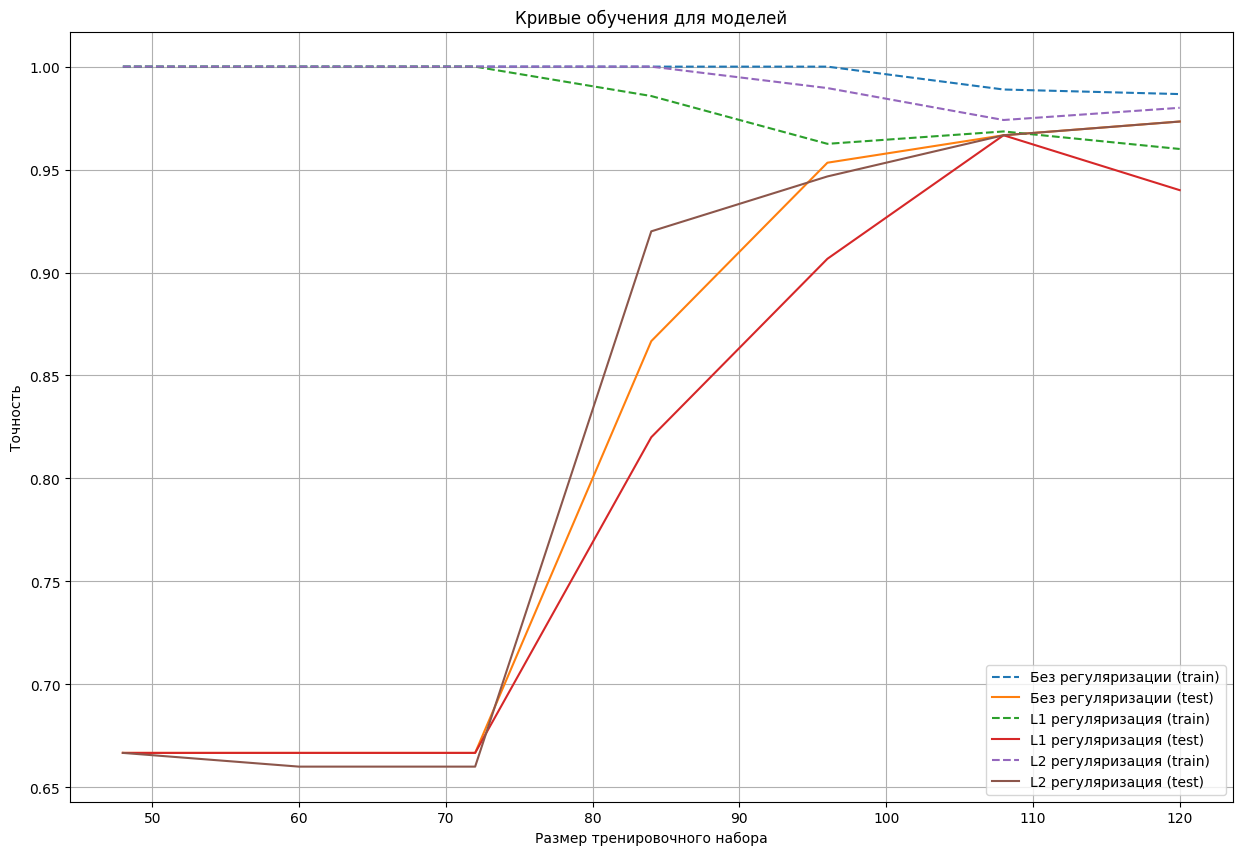

In [31]:
# Сет моделей
models = {
    'Без регуляризации': LogisticRegression(penalty=None, random_state=42),
    'L1 регуляризация': LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=C_values, cv=5, random_state=42),
    'L2 регуляризация': LogisticRegressionCV(penalty='l2', Cs=C_values, cv=5, random_state=42)
}

# Настройте параметры для кривых обучения
train_sizes = np.linspace(0.1, 1.0, 10)

# Настройка размеров графика
plt.figure(figsize=(15, 10))

for model_name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'{model_name} (train)', linestyle='--')
    plt.plot(train_sizes, test_scores_mean, label=f'{model_name} (test)')

plt.title('Кривые обучения для моделей')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Точность')
plt.legend()
plt.grid()
plt.show()

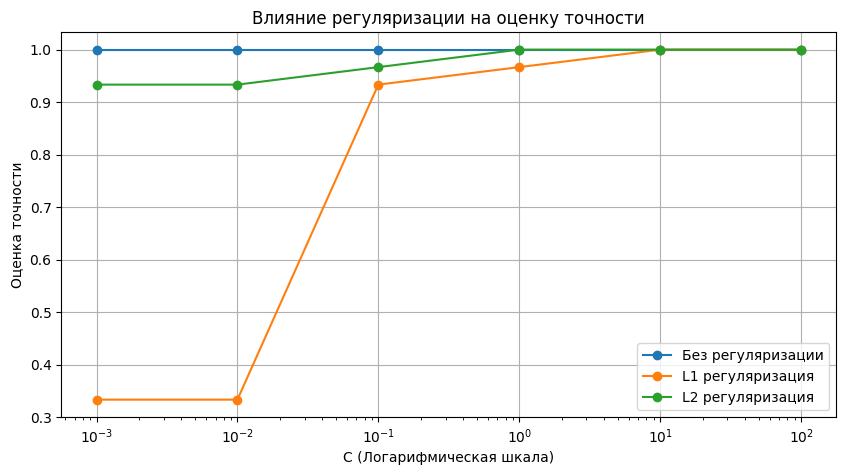

In [32]:
# Переопределим данные для создания графиков
accuracy_no_reg = []
accuracy_l1 = []
accuracy_l2 = []

# Тестируем LogisticRegression без регуляризации, L1 и L2
for C in C_values:
    # Логистическая регрессия без регуляризации
    reg_not = LogisticRegression(penalty=None, random_state=42)
    reg_not.fit(X_train, y_train)
    y_pred_no_reg = reg_not.predict(X_test)
    accuracy_no_reg.append(accuracy_score(y_test, y_pred_no_reg))

    # Логистическая регрессия с L1 регуляризацией
    l1_reg = LogisticRegressionCV(penalty='l1', Cs=[C], solver='liblinear', cv=5, random_state=42)
    l1_reg.fit(X_train, y_train)
    y_pred_l1 = l1_reg.predict(X_test)
    accuracy_l1.append(accuracy_score(y_test, y_pred_l1))

    # Логистическая регрессия с L2 регуляризацией
    l2_reg = LogisticRegressionCV(penalty='l2', Cs=[C], cv=5, random_state=42)
    l2_reg.fit(X_train, y_train)
    y_pred_l2 = l2_reg.predict(X_test)
    accuracy_l2.append(accuracy_score(y_test, y_pred_l2))

# Создаем графики
plt.figure(figsize=(10, 5))
plt.plot(C_values, accuracy_no_reg, label='Без регуляризации', marker='o')
plt.plot(C_values, accuracy_l1, label='L1 регуляризация', marker='o')
plt.plot(C_values, accuracy_l2, label='L2 регуляризация', marker='o')
plt.xscale('log')
plt.xlabel('C (Логарифмическая шкала)')
plt.ylabel('Оценка точности')
plt.title('Влияние регуляризации на оценку точности')
plt.legend()
plt.grid()
plt.show()


##### 4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

#### Краткий отчёт о качестве моделирования с регуляризацией

##### Введение

В данном отчете рассматриваются три модели машинного обучения: без регуляризации, с L1 регуляризацией и с L2 регуляризацией.

Целью является оценка их качества и способности к обобщению на основе полученных результатов.

#### Выбор параметров для моделей с регуляризацией

##### 1. Модель с L1 регуляризацией

- **Параметр**: "penalty='l1"
- **Обоснование**: L1 регуляризация (также известная как лассо-регуляризация) способствует отбору признаков, так как может обнулять коэффициенты незначительных признаков. Это делает модель более интерпретируемой и может помочь избежать переобучения, особенно в случаях с большим количеством признаков или шумными данными.

##### 2. Модель с L2 регуляризацией

- **Параметр**: "penalty='l2'"
- **Обоснование**: L2 регуляризация (также известная как ридж-регуляризация) помогает уменьшить влияние всех признаков, не исключая их полностью. Это может быть полезно, когда все признаки имеют важность, но нужно контролировать их влияние, чтобы избежать переобучения.

#### Полученные результаты

##### Точность моделей

- Без регуляризации:
  - Точность на тренировочных данных: 0.9833333333333333
  - Точность на тестовых данных: 1.0
  - R² score: -1.049912467165833 (низкое значение указывает на плохую способность объяснять вариации)

- С L1 регуляризацией:
  - Точность на тренировочных данных: 0.9666666666666667
  - Точность на тестовых данных: 1.0
  - R² score: -0.606179927588471 (более высокое значение по сравнению с моделью без регуляризации и моделью L2 с регулизацией)

- С L2 регуляризацией:
  - Точность на тренировочных данных: 0.9666666666666667
  - Точность на тестовых данных: 1.0
  - R² score: -0.9340525590020823 (лучше чем у модели без регуляризации но хуже чем L1 с регулизацией)

##### Анализ результатов

- Все три модели показали идеальную точность на тестовых данных 1.0, что может свидетельствовать о том, что данные не содержат сложных паттернов, которые бы затрудняли классификацию.
- Однако модель без регуляризации имеет значительно более низкое значение R2, что указывает на её плохую способность объяснять вариации в данных, и может быть признаком переобучения.
- Модели с L1 и L2 регуляризацией, несмотря на небольшую потерю точности на тренировочных данных, показывают более высокие значения R2, что свидетельствует о лучшем объяснении вариаций и модель L1 выделяется по сравнению с L2 не таким плохим значеним R2.

#### Выводы о качестве моделирования

1. Регуляризация важна: Использование L1 и L2 регуляризаций значительно улучшает способность моделей к обобщению и помогает избежать переобучения, несмотря на небольшую потерю точности на тренировочных данных.
   
2. Интерпретируемость: L1 регуляризация может быть предпочтительнее, когда важен отбор признаков, в то время как L2 лучше подходит для ситуаций, когда все признаки важны и нужно контролировать их влияние.

3. Общая производительность: Все модели продемонстрировали хорошую производительность на тестовых данных, однако регуляризованные модели обеспечивают более надежное объяснение данных и могут быть предпочтительнее в практическом применении.

Таким образом, выбор параметров для моделей с регуляризацией был оправдан, и результаты подтверждают, что регуляризация является важным инструментом для повышения качества моделей в условиях потенциального переобучения.

Среди текущий моделей я считаю самым лучшим вариантом L1 в виду высокой точности и самой низкой R2, что среди текущих вариантов является лучшей, однако есть над чем поработать для достижения лучших результатов.